# Tutorial week 4 

# Learning outcomes
1. Gentle introduction to what is computer vision
2. Review: Important concepts of image stored as Numpy array
3. Image cropping
4. Different types of color models: HSV, RGB and CIELAB
    * Split and merge image channels
    * Manipulate the image channels
5. Point operators.

# What is digital image processing / computer vision?

As humans, we perceive the 3D structure of the world around us with ease. For example, looking at a framed group portrait, you can easily count and name all the people in the picture and even guess at their emotions from their facial expressions.

Perceptual psychologists have spent decades trying to comprehend how visual system works and optical illusions have been discovered to solve the puzzle, a complete solution is still far beyond our reach. 

Computer vision / digital image processing is being utilized in diverse of real world applications:
- Optical character recognition (OCR): reading handwritten postal codes on letters and automatic plate recognition.

  ![OCR](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Portable_scanner_and_OCR_%28video%29.webm/1200px--Portable_scanner_and_OCR_%28video%29.webm.jpg "Optical character recognition")
- Medical imaging: registering pre-operative and intra-operative imagery or performing long term studies of internal organ.

  ![CT scan](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRta2V0mlQ-4oVHOUfyhRGpyPm64T4smphtzg&s "CT scans")
- Self-driving vehicles.

  ![Autonomous driving](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdDERoAxq7k7ujdso6ghyI2hm6yn2cK9pJAQ&s "autonomous vehicle")
- Surveillance: monitoring for intruders, analyzing highway traffic and monitoring pools for drowning victims.

  ![surveillance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP9mr_ytNAapxlWafQLG5AcZZKVZ2wgPheFQ&s "surveillance system")
- Fingerprint recognition and biometrics: automatic access authentication as well as forensic applications.

  ![biometrics](https://www.nec.co.nz/wp-content/uploads/2018/02/Close-up-of-womans-left-eye-showing-iris-recogntion-points-market.jpg "iris recognition")

# Setup

In [1]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
#from utils import display_images

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Review: Representation of image as Numpy array
An image is a multidimensional array; it has columns and rows of pixels, and each pixel has a value. For different kinds of image data, the pixel value may be formatted in different ways. We can create a $4\times 4$ square black image from scratch by simply creating a 2D NumPy array as shown in the following cells.

In [2]:
img = np.zeros((4, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Here, each pixel is represented by a single 8-bit integer, which means that the values of each pixel are in 0-255 range, where 0 is black, 255 is white and the in-between values are shades of gray. This is a **grayscale** image. You can use `cv.cvtColor()` to convert the images from one color space to another. We will discuss about image color spaces later.

In [3]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
print(img_bgr.shape)

(4, 4, 3)


**Exercise**
---
1. Create a $200 \times 200$ white image and display it. 
2. Leverage your image processing skills to create a simple wallpaper design as shown in the following image:

![pattern](img_embed/exercise_w4.jpg "Pattern")

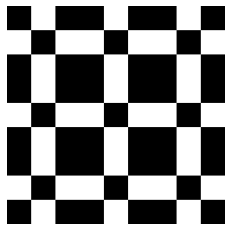

In [14]:
#create a patch with alternative black and white

tile = np.zeros((60,60),dtype = "uint8")

#slice subpatch to assign new values 
tile[:20,20:40] = 255
tile[20:40,:20] = 255
tile[20:40,40:] = 255
tile[40:,20:40] = 255

img = np.tile(tile,(3,3))
plt.axis("off")
plt.imshow(img, cmap = "gray",vmin = 0, vmax = 255)

In [4]:
img = cv.imread("images/flower.jfif")

from utils import display_image
display_image("image",img)

In [6]:
#1st way:GUI(callback)

def mouse(event,x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN: #left mouse click
        print(x,",", y)
        cv.imshow("Image",img)
        
cv.imshow("image",img)
cv.setMouseCallback("image",mouse)
cv.waitKey(0)
cv.destroyAllWindows()

86 , 49


In [ ]:
flower = img[36:112,90:175]
display_image("flower",flower)

In [15]:
#2nd way:

r = cv.selectROI("roi",img)
print(r)
cv.destroyAllWindows()

(188, 128, 0, 0)


the output is $(x,y,w,h)$

In [ ]:
x,y,w,h = r

flower = img[y:y+h,x:x+w]
display_image("flower",flower)

3 ways to extract regions from image

1. use callback function(GUI)
2. use cv.selectROI()
3. use external software

## Access elements in an array

In [ ]:
img = cv.imread('images/lena.jfif')

%timeit a = img[100, 30, 0]
%timeit b = img.item(100, 30, 0)

## Numpy array slicing
### Exercise
2. Extract the region of interest (flower) from the 'flower.jfif'.

# Cropping an image
Why crop an image? 
1. Remove all unwanted objects or areas from an image
2. Improve the overall composition of the image. Visit this [link](https://expertphotography.com/improve-your-composition-the-rule-of-thirds/) on how separating image into grids and putting the subject of interest on the intersection point could create a more compositional pleasing photo. This is known as of rule of thirds.
3. One of the image augmentation techniques in deep learning model training.

The operations are literally the same as extracting ROI.

## Divide an image into smaller patches using cropping
One practical application of cropping in OpenCV is to divide an image into smaller patches. The following example shows how to split image into a $2 \times 3$ grid.

In [2]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

height, width = img.shape[:2]
num_vertical_patches = 2
num_horizontal_patches = 3

# M and N are basically number of pixels per patch
M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

x1, y1 = 0, 0

for y in range(0, height, M):
    for x in range(0, width, N):
        
        y1 = y + M
        x1 = x + N
        
        if x1>=width and y1>=height:
            x1 = width-1
            y1 = height-1 #indexing so minus 1 because start with 0 
            tile = img[y:height, x:width]
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            cv.imshow('tile', tile)
            
        elif y1>=height:
            y1 = height-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        elif x1>=width:
            x1 = width-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)

cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise
1. Divide the image into 4 equal regions. Swap their positions as shown below:

   ![dog_swap](img_embed/crop_swap.PNG "dog")
2. Cover the face of lena with white mask as shown as the following:

   ![lena_mask](img_embed/lena_mask.PNG "lena mask")

3. Extract the region of interest (flower) from the 'flower.jfif'.

In [13]:
#question1
import cv2 as cv
import numpy as np

# Load the image
img = cv.imread('images/dog.jfif')

height, width = img.shape[:2]

# Divide the image into 4 regions
mid_h, mid_w = height // 2, width // 2
top_left = img[0:mid_h, 0:mid_w]
top_right = img[0:mid_h, mid_w:width]
bottom_left = img[mid_h:height, 0:mid_w]
bottom_right = img[mid_h:height, mid_w:width]

# Create a new image and swap regions
new_image = np.zeros_like(img)
new_image[0:mid_h, 0:mid_w] = bottom_right
new_image[0:mid_h, mid_w:width] = bottom_left
new_image[mid_h:height, 0:mid_w] = top_right
new_image[mid_h:height, mid_w:width] = top_left

# Display the images
cv.imshow('Original Image', img)
cv.imshow('swapped regions', new_image)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
#question2

img = cv.imread('images/lena.jfif')

# Get the dimensions of the image
roi  = cv.selectROI(img)
print(roi)

# Draw a white rectangle over the face
cv.rectangle(img, (85, 87), (85+75, 87+85), (255, 255, 255), -1)

# Display the image with the white mask
cv.imshow('Lena with White Mask', img)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
#question3

img = cv.imread('images/flower.jfif')
x,y,w,h = cv.selectROI(img)
flower = img[y:y+h,x:x+w]
cv.imshow('Flower', flower)
cv.waitKey(0)
cv.destroyAllWindows()

# Color space / color model
In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of 3 components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white. RGB is considered an "additive" color space, and colors can be imagined as being produced from shining quantities of red, blue and green light onto a black background.

There are so many color spaces because different color spaces are useful for different purposes. We will typically work with 3 kinds of color models: blue-green-red (BGR), grayscale and hue-saturation-value (HSV).

In reality, color is a continuous phenomenon, meaning that there are an infinite number of colors. Color spaces, however represent color through discrete structures (a fixed number of whole number integer values), which is acceptable since the human eye and perception are also limited. 

## RGB color space
It is an additive colorspace where colors are obtained by a linear combination of Red, Green and Blue values. 

There are some inherent problems asociated with RGB colorspace:
- significant perceptual non-uniformity.
- mixing of chrominance and luminance data.

## LAB color space
3 components:
- L: lightness (intensity).
- A: color component ranging from green to red.
- B: color component ranging from blue to yellow.

The L component is independent of color information and encodes brightness only. 

## YCrCb color space
Like LAB colorspace, the luminance and chrominances are separated into different channels. Y is used to represent luminance (or luma), Cb represents blue-difference, and Cr represents red-difference.

## HSV color space
1. Hue is the color attribute that describes pure color. 
2. Saturation is the quantity that reflect the degree to which pure color is diluted by white light.
3. Value or intensity is brightness.

![hsv cylindrical spectrum](img_embed/hsv_cylindrical.jfif "HSV")

> **Important** 🗝️
>
> In OpenCV, hue range is $[0,179]$, saturation range is $[0,255]$, and value range is $[0,255]$. Different software use different scales. So if you are comparing OpenCV values with them, you need to **normalize these ranges**. 
> The important takeaway is: *Lighting condition can mean the difference between success and failure of your computer vision algorithm.* Thus, color space which could factor out luminance into different channel should be the choice.

## Splitting and merging Image channels
The B, G and R channels can be split into their individual planes when needed. Then the individual channels can be merged back together to form BGR image again. The splitting and merging operations can be attained by the following functions respectively:
* `cv.split(m)`, where m is a multi-channel array.
* `cv.merge(mv)`, where mv is a tuple / list of matrices to be merged; all the matrices in mv must have the same size and the same depth (precision of each pixel).

# manipulate hsv channels

In [ ]:
img = cv.imread("images/car.jpg")
#change BGR to HSV
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
#split the channles
h,s,v = cv.split(img_hsv)

#set a constant for H channel[0-179],it is not 0 -360 because opencv has normalized it
h_bias = 70
h_new = np.zeros_like(h) + h_bias
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

from utils import display_images
display_images([img,transform_display],("original",f"Hue = {h_bias}"))

In [ ]:
#saturation

h,s,v = cv.split(img_hsv)

#set a constant for s chanel([0-255])
s_bias = 75
s_new = np.zeros_like(h) + s_bias
s_new = np.uint8(h_new)

transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

from utils import display_images
display_images([img,transform_display],("original",f"Saturation = {s_bias}"))

In [10]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

print(f"Are the two images the same? {np.equal(img, img_merge).all()}")

Are the two images the same? True


## Manipulate image channels

### HSV color channels

#### Hue channel

In [9]:
# set the hue to a certain value
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
h_new = np.zeros_like(h) + 30
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "hue=30"))

In [10]:
# change the saturation 
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
s_new = np.zeros_like(s) + 255
s_new = np.uint8(s_new)

transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "saturation decrease"))

### Exercise
1. Display the blue, green and red channel of the **lena** image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

![exercise_fig](img_embed/diff_color_channels.jpg "color dogs")

In [12]:
#question 1

img = cv.imread('images/lena.jfif')

#blue = img[:,:,0]
#green = img[:,:,1]
#red = img[:,:,2]

blue,green,red= cv.split(img)

display_images([blue,green, red],("blue","green","red"))

In [9]:
#question 2
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

colors = ("blue", "green", "red")
h,s,v = cv.split(img)

for i, channel in enumerate(channels):
    new_channel = np.zeros_like(h) + 255
    new_channel = np.uint8(new_channel)
    img_copy = img.copy()
    img_copy[...,i] = new_channel
    cv.imshow(colors[i], img_copy)

cv.waitKey(0)
cv.destroyAllWindows()

# Point operator 

## Point operator
It is merely mathematical operations on each pixel value of an image. The formula is as follows:
$$f(x, y) = \alpha f(x, y) + \beta$$


In [ ]:
np.uint8([-1,0,255,256,257])

In [ ]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [ ]:
#load on image to change its brightness

img = cv.imread("img/camera.jpg")
alpha = 1.2 # increase constrast(>1), vice versa
beta = 30 # increase brightness(>0), vice versa
dst = poitn_op(img,alpha = alpha, beta = beta)

display_images ([img_dst],("orginal","pixel_transform")

In [ ]:
# can also do on others such as l on cielab

### Enhance the contrast and brighten the image

In [13]:
gray = cv.imread('images/camera.jpg', 0)
transform = point_op(gray, 2, 0)

display_images([gray, transform], ("grayscale", "transform"))

### Lower the contrast and darken the image

In [14]:
transform2 = point_op(gray, 1, -50)

display_images([gray, transform2], ("grayscale", "darken"))

## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

In [10]:
#question 1

import cv2
import numpy as np

# Define image dimensions (adjust width and height as desired)
width = 320
height = 240

# Calculate total number of pixels
total_pixels = width * height

# Create random color noise image
color_noise = np.random.randint(0, 256, size=(height, width, 3), dtype=np.uint8)  # 3 channels for RGB

# Create random grayscale noise image
grayscale_noise = np.random.randint(0, 256, size=(total_pixels // 3, ), dtype=np.uint8)  # Integer division for grayscale

# Reshape grayscale noise to match color image dimensions (repeat each value 3 times)
grayscale_noise_reshaped = np.repeat(grayscale_noise, 3).reshape(height, width)

# Display both images
cv2.imshow("Color Noise", color_noise)
cv2.imshow("Grayscale Noise", grayscale_noise_reshaped)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
#question 2

import cv2
import numpy as np


def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
  """
  Crops an image into a grid and displays grid lines.

  Args:
      img (np.ndarray): The source image as a NumPy array.
      num_horizontal_grid (int): Number of patches along the horizontal axis.
      num_vertical_grid (int): Number of patches along the vertical axis.
      line_color (tuple, optional): Color of the grid lines in BGR format. Defaults to green (0, 255, 0).

  Returns:
      np.ndarray: The image with grid lines overlaid.
  """

  height, width = img.shape[:2]  # Get image height and width

  # Calculate patch dimensions (consider integer division for floor)
  patch_width = width // num_horizontal_grid
  patch_height = height // num_vertical_grid

  # Draw horizontal grid lines
  for i in range(1, num_vertical_grid):
    y_pos = i * patch_height
    cv2.line(img, (0, y_pos), (width, y_pos), line_color, thickness=2)

  # Draw vertical grid lines
  for i in range(1, num_horizontal_grid):
    x_pos = i * patch_width
    cv2.line(img, (x_pos, 0), (x_pos, height), line_color, thickness=2)

  return img


# Example usage
img = cv2.imread("images/winter.jfif")
grid_img = crop_grid(img.copy(), 3, 2)  # Copy image to avoid modifying original
cv2.imshow("Image with Grid", grid_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#question 3

#1st way: using cv2.addWeighted
import cv2
import numpy as np

def adjust_brightness_weighted(image, brightness_factor):
  """
  Adjusts the brightness of a color image using cv2.addWeighted.

  Args:
      image (np.ndarray): The input image as a NumPy array.
      brightness_factor (float): A value to add to each pixel (positive for brighter, negative for darker).

  Returns:
      np.ndarray: The image with adjusted brightness.
  """

  alpha = 1.0  # Controls the overall weight of the image
  beta = brightness_factor  # Value to add to each pixel

  # Convert image to float32 for better precision during calculations
  image = image.astype(np.float32)

  # Apply weighting to adjust brightness
  adjusted_image = cv2.addWeighted(image, alpha, image, 0, beta)

  # Convert back to uint8 for display
  adjusted_image = adjusted_image.astype(np.uint8)

  return adjusted_image

# Example usage
image = cv2.imread("images/soccer.jpg")
brighter_image = adjust_brightness_weighted(image.copy(), 30)  # Increase brightness by 30
darker_image = adjust_brightness_weighted(image.copy(), -20)  # Decrease brightness by 20

# Display original and adjusted images
cv2.imshow("Original Image", image)
cv2.imshow("Brighter Image", brighter_image)
cv2.imshow("Darker Image", darker_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
#question 3

#2nd way: using channel scalling
import cv2
import numpy as np

def adjust_brightness_scaling(image, brightness_factor):
  """
  Adjusts the brightness of a color image by scaling channel intensities.

  Args:
      image (np.ndarray): The input image as a NumPy array.
      brightness_factor (float): A scaling factor for pixel intensities (positive for brighter, negative for darker).

  Returns:
      np.ndarray: The image with adjusted brightness.
  """

  # Check if brightness factor is within a reasonable range
  if brightness_factor < -1.0 or brightness_factor > 1.0:
    raise ValueError("Brightness factor must be between -1.0 and 1.0")

  # Apply scaling to each channel using broadcasting
  adjusted_image = np.clip((image * (1.0 + brightness_factor)), 0, 255).astype(np.uint8)

  return adjusted_image

# Example usage (same as method 1)
image = cv2.imread("images/soccer.jpg")
brighter_image = adjust_brightness_scaling(image.copy(), 0.2)  # Increase brightness by 20%
darker_image = adjust_brightness_scaling(image.copy(), -0.1)  # Decrease brightness by 10%

# Display original and adjusted images (same as method 1)
cv2.imshow("Original Image", image)
cv2.imshow("Brighter Image", brighter_image)


question 4:

    RGB:Digital images, displays, image processing
    HSV:Color selection, manipulation, image segmentation
    CIELAB:Color matching, difference measurement, color gamut mapping